In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pipeline as pl

OUTCOME_VAR = 'SeriousDlqin2yrs'
INDEX_COL = 0

%matplotlib inline

# Read in data and generate summary statistics

In [2]:
df = pl.read_data('cs-training.csv', INDEX_COL)

In [3]:
pl.explore_data(df)

### Summary Statistics ###
SeriousDlqin2yrs
count    150000.000000
mean          0.066840
std           0.249746
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SeriousDlqin2yrs, dtype: float64
Null values: 0

RevolvingUtilizationOfUnsecuredLines
count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64
Null values: 0

age
count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64
Null values: 0

NumberOfTime30-59DaysPastDueNotWorse
count    150000.000000
mean          0.421033
std           4.192781
min           0.000000
25%           0.000000
50%           0.000000
75%           0.

# Split data into test-train sets

In [4]:
cols = list(df.columns)
features = [x for x in cols if x != OUTCOME_VAR]

In [5]:
X_train, X_test, y_train, y_test = pl.split_train_test(df, features, OUTCOME_VAR, .33)

# Fill null values with means


In [6]:
v = pl.fill_train_na_mean(X_train)

In [7]:
pl.fill_test_na_mean(X_test,v)

# Generate histograms

In [8]:
for c in features:
    pl.make_hist(X_train, c, 10)

Plotting RevolvingUtilizationOfUnsecuredLines
Plotting age
Plotting NumberOfTime30-59DaysPastDueNotWorse
Plotting DebtRatio
Plotting MonthlyIncome
Plotting NumberOfOpenCreditLinesAndLoans
Plotting NumberOfTimes90DaysLate
Plotting NumberRealEstateLoansOrLines
Plotting NumberOfTime60-89DaysPastDueNotWorse
Plotting NumberOfDependents


# Fit and test a bunch of classifiers and parameters

In [9]:
clfs,grid = pl.define_clfs_params()

In [10]:
clfs_to_try = ['LR', 'DT', 'KNN', 'AB', 'RF']

###
LR
###

Time: 21s
Accuracy: 0.93
ROC/AUC Score: 0.51
Classication Report:
             precision    recall  f1-score   support

          0       0.93      1.00      0.97     46210
          1       0.50      0.03      0.05      3290

avg / total       0.91      0.93      0.90     49500




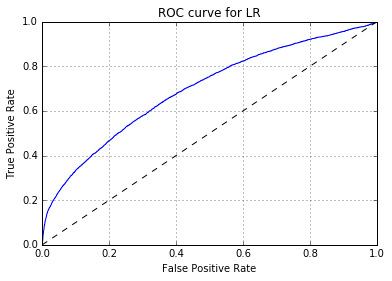

###
DT
###

Time: 42s
Accuracy: 0.94
ROC/AUC Score: 0.56
Classication Report:
             precision    recall  f1-score   support

          0       0.94      0.99      0.97     46210
          1       0.59      0.13      0.22      3290

avg / total       0.92      0.94      0.92     49500




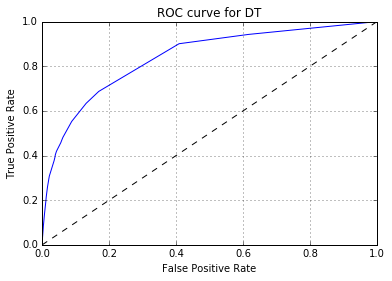

###
KNN
###

Time: 141s
Accuracy: 0.93
ROC/AUC Score: 0.51
Classication Report:
             precision    recall  f1-score   support

          0       0.93      1.00      0.97     46210
          1       0.62      0.01      0.02      3290

avg / total       0.91      0.93      0.90     49500




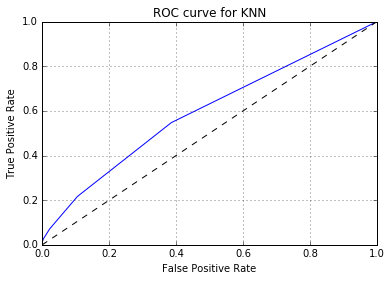

###
AB
###

Time: 40s
Accuracy: 0.94
ROC/AUC Score: 0.6
Classication Report:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97     46210
          1       0.56      0.21      0.30      3290

avg / total       0.92      0.94      0.92     49500




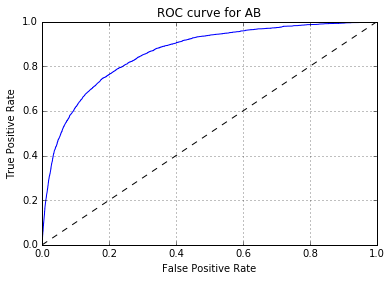

###
RF
###

Time: 141s
Accuracy: 0.94
ROC/AUC Score: 0.58
Classication Report:
             precision    recall  f1-score   support

          0       0.94      0.99      0.97     46210
          1       0.61      0.18      0.27      3290

avg / total       0.92      0.94      0.92     49500




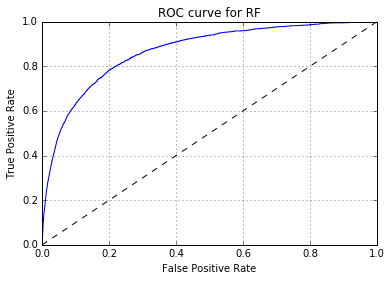

In [11]:
results = pl.try_models(clfs_to_try,clfs,grid, X_train, y_train, X_test, y_test)

# Print out a metrics report

###
AB
###

Time: 40s
Accuracy: 0.94
ROC/AUC Score: 0.6
Classication Report:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97     46210
          1       0.56      0.21      0.30      3290

avg / total       0.92      0.94      0.92     49500




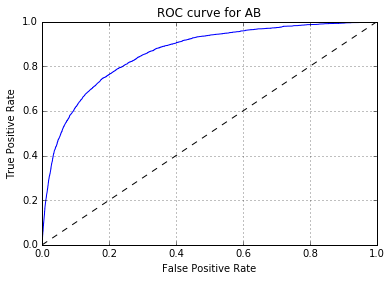

###
DT
###

Time: 42s
Accuracy: 0.94
ROC/AUC Score: 0.56
Classication Report:
             precision    recall  f1-score   support

          0       0.94      0.99      0.97     46210
          1       0.59      0.13      0.22      3290

avg / total       0.92      0.94      0.92     49500




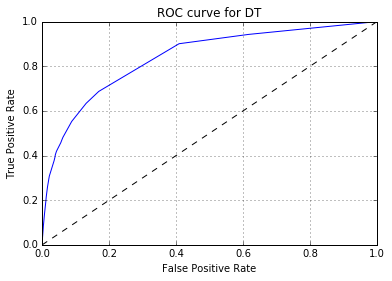

###
KNN
###

Time: 141s
Accuracy: 0.93
ROC/AUC Score: 0.51
Classication Report:
             precision    recall  f1-score   support

          0       0.93      1.00      0.97     46210
          1       0.62      0.01      0.02      3290

avg / total       0.91      0.93      0.90     49500




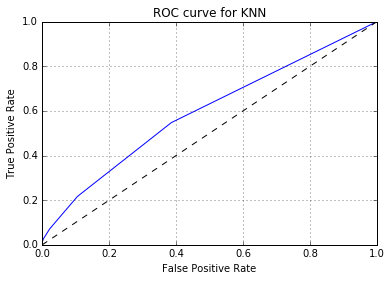

###
RF
###

Time: 141s
Accuracy: 0.94
ROC/AUC Score: 0.58
Classication Report:
             precision    recall  f1-score   support

          0       0.94      0.99      0.97     46210
          1       0.61      0.18      0.27      3290

avg / total       0.92      0.94      0.92     49500




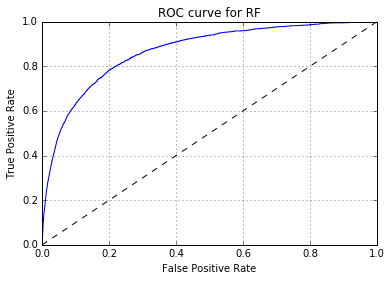

###
LR
###

Time: 21s
Accuracy: 0.93
ROC/AUC Score: 0.51
Classication Report:
             precision    recall  f1-score   support

          0       0.93      1.00      0.97     46210
          1       0.50      0.03      0.05      3290

avg / total       0.91      0.93      0.90     49500




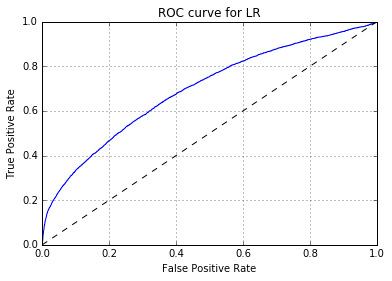

In [12]:
pl.print_full_report(results)

# Pull out best-performing model

In [13]:
best_clf = results['AB']['Best Model']

In [14]:
print(best_clf.best_params_)

{'AB__algorithm': 'SAMME.R', 'AB__n_estimators': 100}


# Read in and fill test data

In [15]:
final_df = pl.read_data('cs-test.csv', INDEX_COL)

In [16]:
pl.fill_test_na_mean(final_df,v)

# Predict outcomes for test data

In [17]:
pl.predict(final_df, features, best_clf)